# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Reynaldy Nurcahyo
- **Email:** reynaldy.nur.cahyo.003@gmail.com
- **ID Dicoding:** reynaldnc

## Menentukan Pertanyaan Bisnis

1. Produk dari kategori apa saja yang mempunyai rating bagus?
2. Produk dari kategori apa saja yang mempunyai rating buruk?
3. Produk apa saja yang paling banyak terjual?
4. Produk apa saja yang paling sedikit terjual?
5. Bagaimana hubungan rating dengan penjualan produk?
5. Bagaimana persebaran pembeli? Wilayah mana dengan jumlah pembeli terbanyak?
6. Bagaimana analisis RFM pada dataset ini?

# Persiapan

Install library yang dibutuhkan jika diperlukan

In [58]:
%pip install folium geopandas geodatasets seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


Import Semua Packages/Library yang Digunakan

In [59]:
import folium
import geopandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from folium import plugins

Function untuk mempermudah print informasi dataframe

In [60]:
def print_dfinfo(df: pd.DataFrame, dup: list | None = None):
    print('Jumlah duplikasi: ', df.duplicated(dup).sum())
    print('----------------------------------------------------------')
    print('Jumlah NaN: ')
    print(df.isna().sum())
    print('----------------------------------------------------------')
    df.info()
    print('----------------------------------------------------------')
    print(df.describe())

## Data Wrangling

### Gathering Data

In [61]:
order_df = pd.read_csv('./orders_dataset.csv')
geoloc_df = pd.read_csv('./geolocation_dataset.csv')
product_df = pd.read_csv('./products_dataset.csv')
customer_df = pd.read_csv('./customers_dataset.csv')
order_items_df = pd.read_csv('./order_items_dataset.csv')
order_reviews_df = pd.read_csv('./order_reviews_dataset.csv')

### Assessing Data

In [62]:
print_dfinfo(order_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order

**Insight:**
- Data tersebut memiliki 160-2900+ missing value pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.
- Ketiga data tersebut tidak diperlukan untuk saat ini, kita dapat menghapusnya nanti.
- Kolom order_purchase_timestamp memiliki kesalahan tipe data, kita akan merubahnya nanti.
- Data tersebut tidak memiliki duplikat.

In [63]:
print_dfinfo(order_items_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
-----------------------------

**Insight:**
- Data tersebut tidak memiliki duplikat maupun missing value.
- Kita dapat menghapus kolom seller_id dan shipping_limit_date, karena tidak diperlukan untuk saat ini.
- Kita dapat menggabungkan kolom price dengan freight_value dan menghasilkan kolom baru dari penjumlahan keduanya.

In [64]:
print_dfinfo(order_reviews_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), o

**Insight:**
- Data tersebut tidak memiliki duplikat, namun memiliki beberapa kolom yang tidak diperlukan seperti review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp.

In [65]:
print_dfinfo(product_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g 

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

**Insight:**
- Kita hanya memerlukan kolom product_id dan product_category_name, kita dapat menghapus sisanya.
- Namun, kolom product_category_name memiliki 610 missing value.
- Hal tersebut tidak masalah karena kita akan mengisinya dengan "Unknown Category"

In [66]:
print_dfinfo(customer_df)

Jumlah duplikasi:  0
----------------------------------------------------------
Jumlah NaN: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
----------------------------------------------------------
       customer_zip_code_prefix
count              99441.000000
mean               35137.4

**Insight:**
- Data tersebut sudah bersih

In [67]:
print_dfinfo(geoloc_df, ['geolocation_lat', 'geolocation_lng'])

Jumlah duplikasi:  281700
----------------------------------------------------------
Jumlah NaN: 
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
----------------------------------------------------------
       geol

**Insight:**
- Pada geoloc_df, kita melihat ada 281.000+ duplikat. Jika kita melihat ke dalam data tersebut, terdapat banyak sekali data duplikat terkait Latitude dan Longitude. Mengapa tidak mencari duplikat berdasarkan kode pos? Bicara tentang Latitude dan Longitude, jika kamu dan teman mu berbeda jarak 1 meter, maka kamu dan temanmu akan memiliki posisi Latitude dan Longitude yang berbeda. Karena itulah kita tidak dapat menjadikan kode pos sebagai patokan.

### Cleaning Data

In [68]:
# Bersihkan "order_df"

# Menghilangkan kolom yang tidak diperlukan
order_df.drop(
    columns=[
        'order_approved_at', 
        'order_delivered_carrier_date', 
        'order_delivered_customer_date', 
        'order_estimated_delivery_date'
    ],
    inplace=True
)

order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])

order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


**Insight:**
- Kita telah berhasil menghapus beberapa kolom yang tidak diperlukan.
- Kolom order_purchase_timestamp berhasil diubah tipe datanya menjadi datetime.
- Kolom order_purchase_timestamp diperlukan untuk analisis RFM nanti.

In [69]:
# Bersihkan "order_reviews_df"

# Menghilangkan beberapa kolom yang tidak dibutuhkan
order_reviews_df.drop(
    columns=[
        'review_comment_title',       
        'review_comment_message',     
        'review_creation_date',           
        'review_answer_timestamp',
    ],
    inplace=True
)

order_reviews_df.info()
order_reviews_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score  
0                 4  
1                 5  
2                 5  
3                 5  
4                 5  
...             ...  
99219             5  
99220             5  
99221             5  
99222             4  
99223             1  

[99224 rows x 3 columns]

**Insight:**
- Beberapa kolom yang tidak diperlukan berhasil dihapus. 
- Dataset tidak berubah banyak.

In [70]:
# Bersihkan "product_df"

# Mengubah missing value pada "product_df"
product_df.fillna('unknown_category', inplace=True)

# Menghapus beberapa kolom yang tidak dibutuhkan
product_df.drop(
    columns=[
        'product_description_lenght',
        'product_name_lenght',
        'product_photos_qty',
        'product_weight_g',
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ],
    inplace=True
)

product_df.info()
product_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


/tmp/ipykernel_20808/1884714202.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown_category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  product_df.fillna('unknown_category', inplace=True)


product_id              product_category_name
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer
3      cef67bcfe19066a932b7673e239eb23d                              bebes
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas
...                                 ...                                ...
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho

[32951 rows x 2 columns]

**Insight:**
- Banyak kolom yang dihapus karena tidak diperlukan, dan hanya menyisakan product_id dan product_category_name.
- Kita merubah missing value pada kolom product_category_name menjadi "unknown_category"

In [71]:
# Bersihkan "order_items_df"

order_items_df.drop(columns=['seller_id', 'shipping_limit_date'], inplace=True)

order_items_df.info()
order_items_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id   price  freight_value  
0       4244733e06e7ecb4970a6e2683c13e61   58.90          13.29  
1       e5f2d52b802189ee658865ca93d83a8f  239.90          19.93  
2       c777355d18b72b67abbeef9df44fd0fd  199.00          17.87  
3       7634da152a4610f1595efa32f14722fc   12.99          12.79  
4       ac6c3623068f30de03045865e4e10089  199.90          18.14  
...                                  ...     ...            ...  
112645  4aa6014eceb682077f9dc4bffebc05b0  299.99          43.41  
112646  32e07fd915822b0765e448c4dd74c828  350.00          36.53  
112647  72a30483855e2eafc67aee5dc2560482   99.90          16.95  
112648  9c422a519119dcad7575db5af1ba540e   55.99           8.72  
112649  350688d9dc1e75ff97be326363655e01   43.00          12.79  

[112650 rows x 5 columns]

**Insight:**
- Kolom seller_id dan shipping_limit_date berhasil dihapus, tetapi dataset tidak berubah.

In [72]:
# Bersihkan "geoloc_df"

geoloc_df.drop_duplicates(['geolocation_lat', 'geolocation_lng'], inplace=True)

geoloc_df.info()
geoloc_df

<class 'pandas.core.frame.DataFrame'>
Index: 718463 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  718463 non-null  int64  
 1   geolocation_lat              718463 non-null  float64
 2   geolocation_lng              718463 non-null  float64
 3   geolocation_city             718463 non-null  object 
 4   geolocation_state            718463 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 32.9+ MB


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000155                        99965       -28.180655       -52.034367   
1000156                        99950       -28.072188       -52.011272   
1000157                        99950       -28.068864       -52.012964   
1000158                        99950       -28.068639       -52.010705   
1000161                        99980       -28.388932       -51.846871   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000155       agua santa                RS  
1000156         tapejara                RS  
1000157         tapejara                RS  
1000158         tapejara                RS  
1000161  david canabarro                RS  

[718463 rows x 5 columns]

**Insight:**
- Duplikat pada kolom geolocation_lat dan geolocation_lng berhasil dihapus.
- Dataset menyisakan 718.000+ baris tanpa ada pengurangan informasi.

## Exploratory Data Analysis (EDA)

### Explore order_items_df

kita dapat menggabungkan kolom "price" dan "freight_value" pada order_items_df dengan menjumlahkan keduanya pada setiap baris dan menyimpannya pada kolom baru bernama "total_price".

In [73]:
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']

Setelah menyimpan keduanya pada kolom "total_price", lalu kita dapat menghapus kedua kolom tersebut (price dan freight_value).

In [74]:
order_items_df.drop(columns=['price', 'freight_value'], inplace=True)
order_items_df

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id  total_price  
0       4244733e06e7ecb4970a6e2683c13e61        72.19  
1       e5f2d52b802189ee658865ca93d83a8f       259.83  
2       c777355d18b72b67abbeef9df44fd0fd       216.87  
3       7634da152a4610f1595efa32f14722fc        25.78  
4       ac6c3623068f30de03045865e4e10089       218.04  
...                                  ...          ...  
112645  4aa6014eceb682077f9dc4bffebc05b0       343.40  
112646  32e07fd915822b0765e448c4dd74c828       386.53  
112647  72a30483855e2eafc67aee5dc2560482       116.85  
112648  9c422a519119dcad7575db5af1ba540e        64.71  
112649  350688d9dc1e75ff97be326363655e01        55.79  

[112650 rows x 4 columns]

**Insight:**
- Penggabungan price dan freight_value menghasilkan insight baru mengenai pengeluaran tiap customer.

## Explore Semua Dataset "Order"

Kita akan menggabungkan semua dataset yang berhubungan dengan "order" menjadi satu dataset utuh.

In [75]:
# Gabungkan "order_items_df" dan "order_reviews_df"
order_details_df = pd.merge(
    left=order_items_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id',
)

# Gabungkan "order_details_df" dan "order_df"
order_status_df = pd.merge(
    left=order_details_df,
    right=order_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

# Gabungkan "order_details_df" dan "product_df"
order_full_df = pd.merge(
    left=order_status_df,
    right=product_df,
    how='left',
    left_on='product_id',
    right_on='product_id',
)

order_full_df.info()
order_full_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113314 non-null  object        
 1   order_item_id             113314 non-null  int64         
 2   product_id                113314 non-null  object        
 3   total_price               113314 non-null  float64       
 4   review_id                 112372 non-null  object        
 5   review_score              112372 non-null  float64       
 6   customer_id               113314 non-null  object        
 7   order_status              113314 non-null  object        
 8   order_purchase_timestamp  113314 non-null  datetime64[ns]
 9   product_category_name     113314 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 8.6+ MB


order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
113309  fffc94f6ce00a00581880bf54a75a037              1   
113310  fffcd46ef2263f404302a634eb57f7eb              1   
113311  fffce4705a9662cd70adb13d4a31832d              1   
113312  fffe18544ffabc95dfada21779c9644f              1   
113313  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id  total_price  \
0       4244733e06e7ecb4970a6e2683c13e61        72.19   
1       e5f2d52b802189ee658865ca93d83a8f       259.83   
2       c777355d18b72b67abbeef9df44fd0fd       216.87   
3       7634da152a4610f1595efa32f14722fc        25.78   
4       ac6c3623068f30de03045865e4e10089       218.04   
...                                  ...          ...   
113309  4aa6014eceb682077f9dc4bffebc05b0       343.40   
113310  32e07fd915822b0765e448c4dd74c828       386.53   
113311  72a30483855e2eafc67aee5dc2560482       116.85   
113312  9c422a519119dcad7575db5af1ba540e        64.71   
113313  350688d9dc1e75ff97be326363655e01        55.79   

                               review_id  review_score  \
0       97ca439bc427b48bc1cd7177abe71365           5.0   
1       7b07bacd811c4117b742569b04ce3580           4.0   
2       0c5b33dea94867d1ac402749e5438e8b           5.0   
3       f4028d019cb58564807486a6aaf33817           4.0   
4       940144190dcba6351888cafa43f3a3a5           5.0   
...                                  ...           ...   
113309  9185f849f32d82e216a4e025e0c50f5c           5.0   
113310  be803f6a93d64719fd685c1cc610918a           5.0   
113311  dbdd81cd59a1a9f94a10a990b4d48dce           5.0   
113312  fba117c9ac40d41ca7be54741f471303           5.0   
113313  b2700869a37f1aafc9dda829dc2f9027           5.0   

                             customer_id order_status  \
0       3ce436f183e68e07877b285a838db11a    delivered   
1       f6dd3ec061db4e3987629fe6b26e5cce    delivered   
2       6489ae5e4333f3693df5ad4372dab6d3    delivered   
3       d4eb9395c8c0431ee92fce09860c5a06    delivered   
4       58dbd0b2d70206bf40e62cd34e84d795    delivered   
...                                  ...          ...   
113309  b51593916b4b8e0d6f66f2ae24f2673d    delivered   
113310  84c5d4fbaf120aae381fad077416eaa0    delivered   
113311  29309aa813182aaddc9b259e31b870e6    delivered   
113312  b5e6afd5a41800fdf401e0272ca74655    delivered   
113313  96d649da0cc4ff33bb408b199d4c7dcf    delivered   

       order_purchase_timestamp   product_category_name  
0           2017-09-13 08:59:02              cool_stuff  
1           2017-04-26 10:53:06                pet_shop  
2           2018-01-14 14:33:31        moveis_decoracao  
3           2018-08-08 10:00:35              perfumaria  
4           2017-02-04 13:57:51      ferramentas_jardim  
...                         ...                     ...  
113309      2018-04-23 13:57:06   utilidades_domesticas  
113310      2018-07-14 10:26:46  informatica_acessorios  
113311      2017-10-23 17:07:56           esporte_lazer  
113312      2017-08-14 23:02:59  informatica_acessorios  
113313      2018-06-09 17:00:18         cama_mesa_banho  

[113314 rows x 10 columns]

**Insight:**
- Penggabungan seluruh dataset yang berhubungan dengan "order" menghasilkan dataset utuh.
- Kita bisa melihat berapa uang yang dikeluarkan setiap pelanggan untuk produk yang ia beli.
- Kita bisa melihat review yang mereka berikan terhadap produk yang mereka beli.
- Namun, banyak memory yang akan terpakai sia-sia dengan membuat banyak variable baru.
- Ada beberapa pelanggan tidak memberikan review terhadap produk yang mereka beli.

## Explore customer_df dan geoloc_df

Berikutnya, kita akan menggabungkan customer_df dan geoloc_df 

In [76]:
# Gabungkan "customer_df" dan "geoloc_df"

customer_full_df = pd.merge(
    left=customer_df,
    right=geoloc_df,
    how='inner',
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
).drop_duplicates(
    ['customer_id', 'customer_unique_id']
).drop(columns=[
    'customer_zip_code_prefix', 
    'customer_city', 
    'customer_state'
])

customer_full_df.sort_values('geolocation_zip_code_prefix')

customer_id                customer_unique_id  \
2430731  7ae2a9337aa4bc799723511faa1d6830  0c1a20644f0dc126c3eaff8dbc1bd12c   
1206891  a09edf8c1e842e94805a206b3d73eed5  968f6d2f674977d88a4b445a5117ccd8   
2437415  ee9b73e88afb4904ee2322cfc89cf638  095e7c124c5c1ccb1eb9f731152eae6a   
8256056  15d7dbcd027b5b24866db33e2b819021  ddab5650ba76e2fa2d7e25ed3343bd92   
1259415  6ec2b4682814cfdac8d92bad42b3ddab  57f0ea1c7f6b9ef8615c0a0b8f06fe57   
...                                   ...                               ...   
9970329  235702411e5214f0e4a0761bf5ce9e99  9fc089b0b6a8db40d4357e784f1e91d4   
4171425  3ab8bc00f8740d54afc4c771fb6c7f69  0528a0a940c7116ccb48fdbb8e80a8ff   
9767793  657ba09c6edfbbc09f6054f541ec1f90  3dbb390afed2043063d358900ae05d0d   
97753    964b34423c822e9bd9831635ccc83db2  e49eafd7e69d43b8d86f6b5590fafd02   
2615143  f04c3f6e20a2a4318d97d7cec1d27bbf  8f846b30f8f56368cd1bf4c89efeed74   

         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
2430731                         1003       -23.549032       -46.635313   
1206891                         1004       -23.550116       -46.635122   
2437415                         1004       -23.550116       -46.635122   
8256056                         1005       -23.549819       -46.635606   
1259415                         1005       -23.549819       -46.635606   
...                              ...              ...              ...   
9970329                        99965       -28.173892       -52.038447   
4171425                        99970       -28.345143       -51.876926   
9767793                        99980       -28.389218       -51.846012   
97753                          99980       -28.389218       -51.846012   
2615143                        99990       -28.329718       -51.769615   

        geolocation_city geolocation_state  
2430731        sao paulo                SP  
1206891        sao paulo                SP  
2437415        sao paulo                SP  
8256056        sao paulo                SP  
1259415        sao paulo                SP  
...                  ...               ...  
9970329       agua santa                RS  
4171425          ciriaco                RS  
9767793  david canabarro                RS  
97753    david canabarro                RS  
2615143        muliterno                RS  

[99139 rows x 7 columns]

**Insight:**
- Kita menghapus beberapa kolom yang berulang seperti customer_zip_code_prefix dengan geolocation_zip_code_prefix. Karena kedua kolom tersebut mempunyai informasi yang sama.
- Jika tidak melakukan pengecekan duplikat pada kolom customer_id dan customer_unique_id, kita akan memiliki data ratusan kali lebih besar.
- Kita dapat mengetahui posisi pembeli melalui data geolocation_lat dan geolocation_lng, yang mana akan kita buat petanya nanti.

> Penting untuk menjalankan kode di bawah ini untuk membersihkan variable yang tidak kita perlukan lagi

In [77]:
# Bersihkan memory

del order_df, order_details_df, order_reviews_df, order_status_df, order_items_df, product_df, customer_df, geoloc_df

## Visualization & Explanatory Analysis

### Pertanyaan 1 & 2:

Buat Dataframe yang akan menampung produk berdasarkan rata-rata rating

In [78]:
product_avg_df = order_full_df.groupby('product_category_name').agg({
    'review_score': 'mean',
})

product_avg_df

review_score
product_category_name                  
agro_industria_e_comercio      4.000000
alimentos                      4.218182
alimentos_bebidas              4.315412
artes                          3.937198
artes_e_artesanato             4.125000
...                                 ...
tablets_impressao_imagem       4.123457
telefonia                      3.946867
telefonia_fixa                 3.683206
unknown_category               3.841051
utilidades_domesticas          4.055019

[74 rows x 1 columns]

Kemudian kita buat visualisasi dari produk terbaik sampai terburuk.

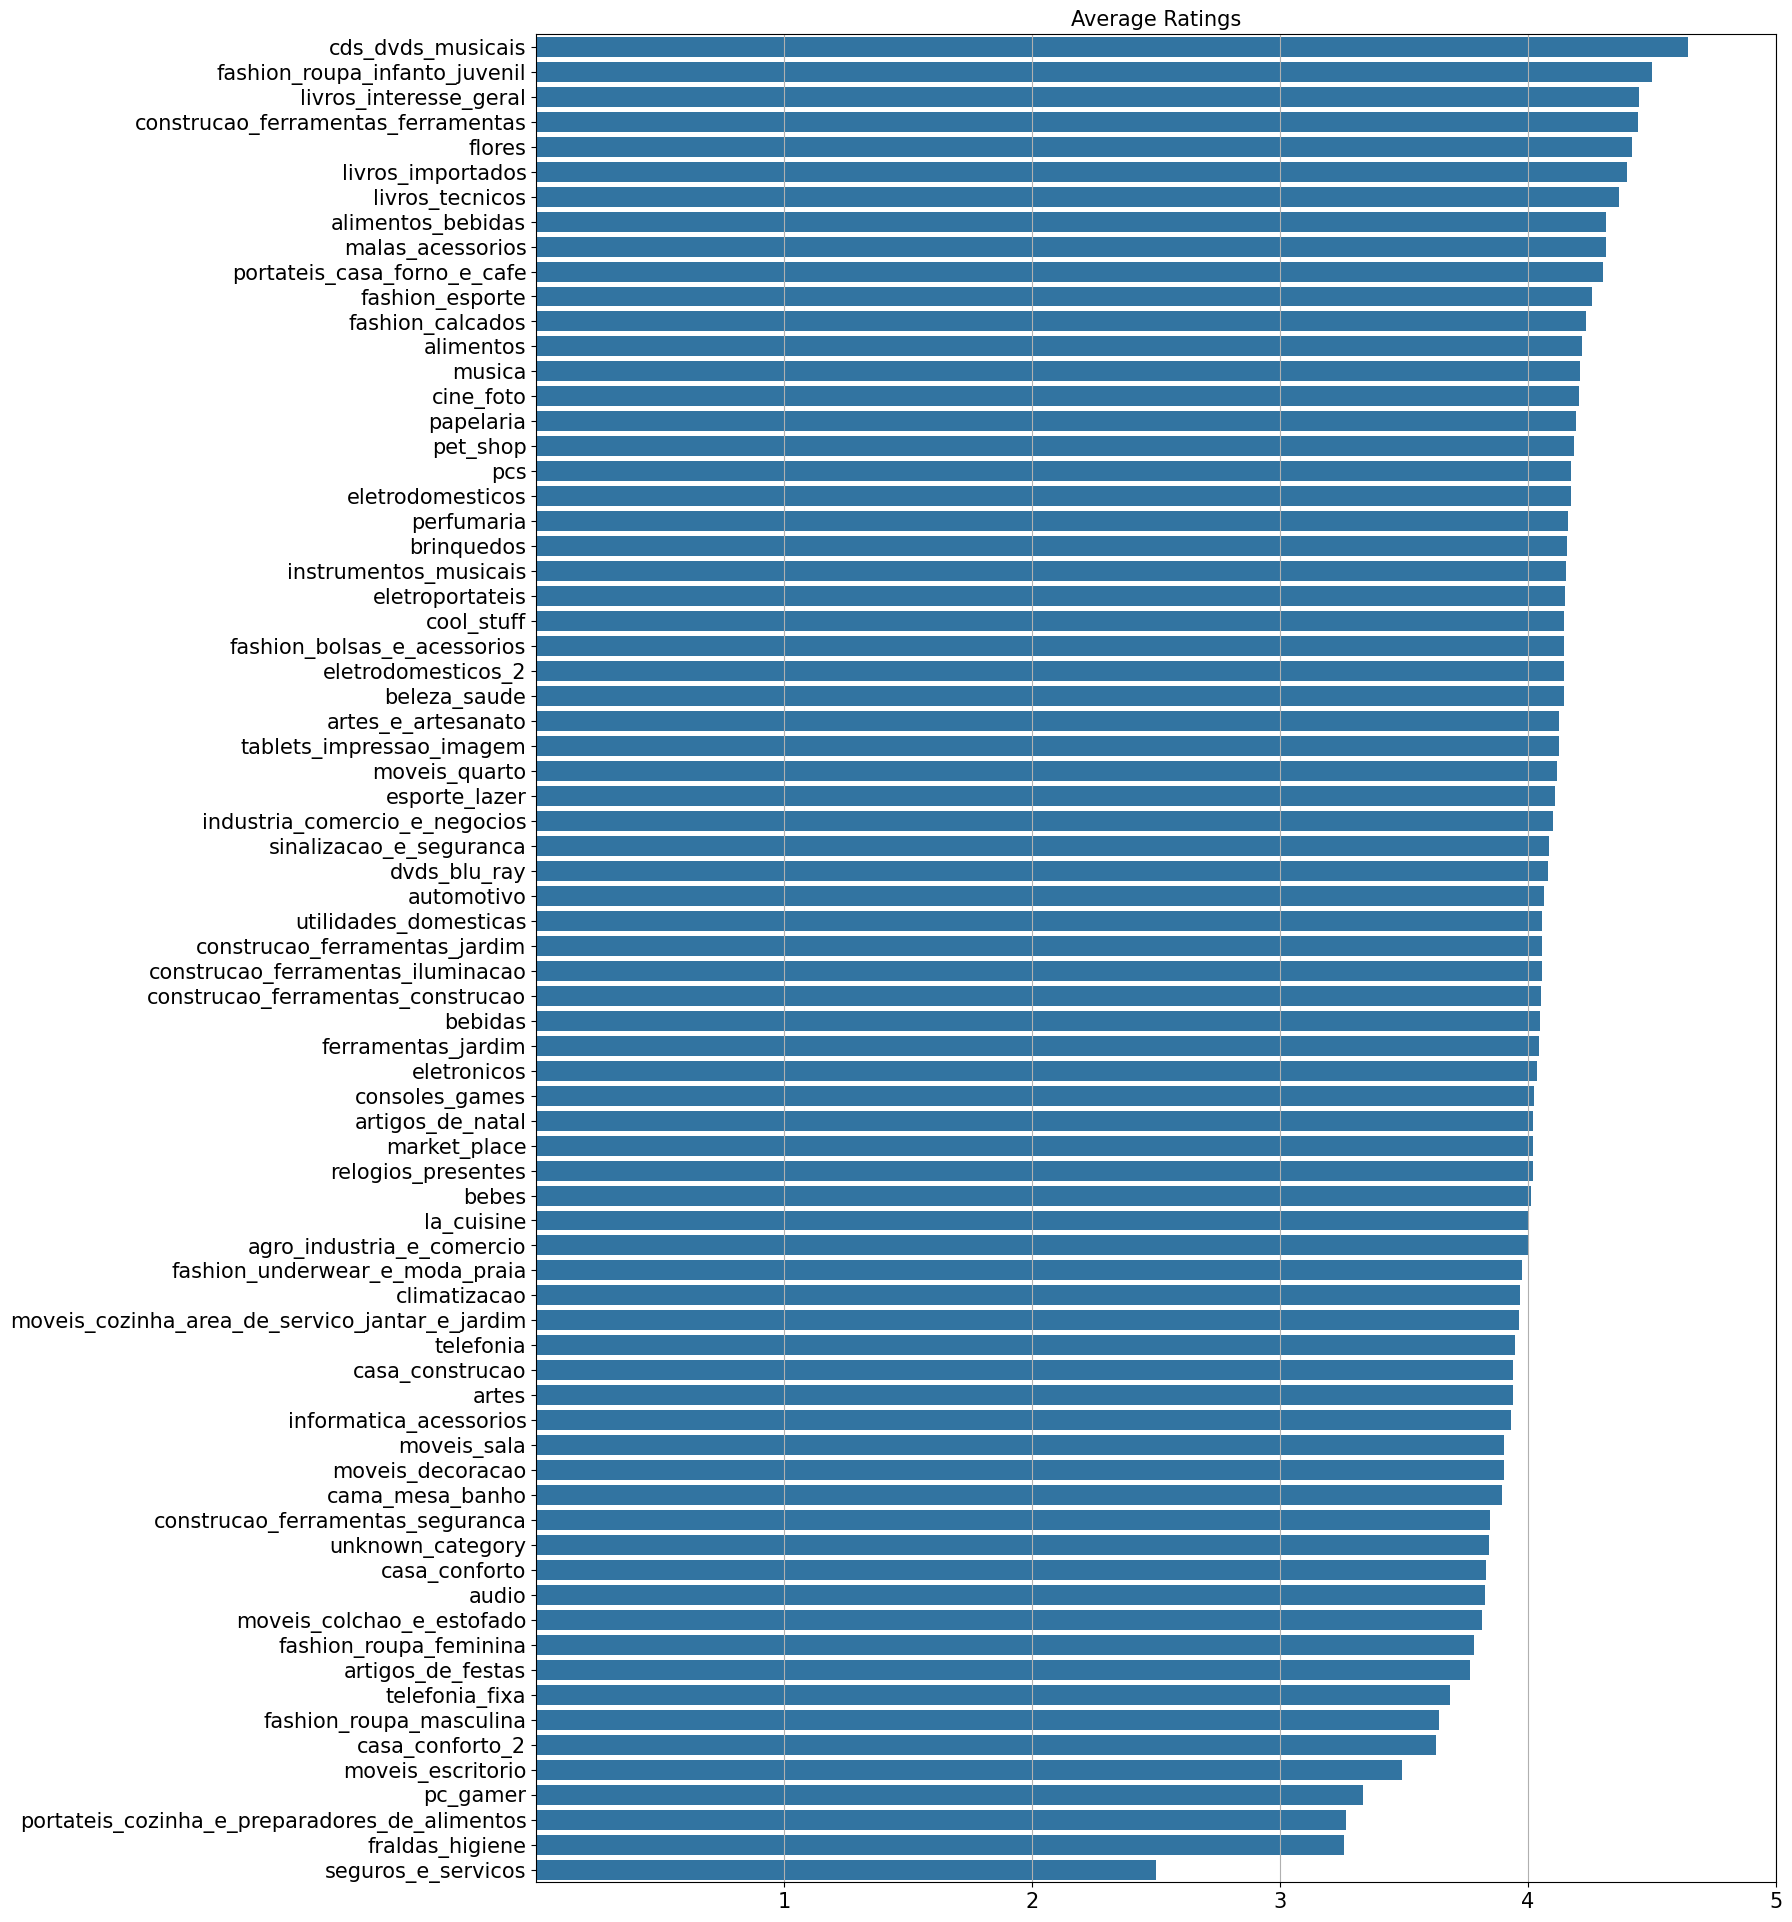

In [79]:
fig, ax = plt.subplots(figsize=(16, 24))

sns.barplot(
    x='review_score', 
    y='product_category_name', 
    data=product_avg_df.sort_values('review_score', ascending=False),
    ax=ax,
    orient='y'
)

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_xticks(np.arange(1, 6))
ax.set_title('Average Ratings', loc='center', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True, axis='x')

plt.show()

In [80]:
# Melihat review dengan rating rendah (di bawah 3)

order_full_df[order_full_df.review_score < 3]

order_id  order_item_id  \
8       0005a1a1728c9d785b8e2b08b904576c              1   
17      000aed2e25dbad2f9ddb70584c5a2ded              1   
31      001427c0ec99cf8af737bd88e92fd444              1   
37      00169e31ef4b29deaae414f9a5e95929              1   
39      0017afd5076e074a48f1f1a4c7bac9c5              1   
...                                  ...            ...   
113282  ffed7e90414c1477a6b92554661d465f              1   
113287  ffefb169ddf34cecc0622a6d3cc387f8              1   
113288  fff0db5573c78c1cb5a2b68a2bbd8d4a              1   
113290  fff2cdc825f9fc0ba3c04227cfa02303              1   
113302  fffb0b1a50e65c449020434fa835e078              1   

                              product_id  total_price  \
8       310ae3c140ff94b03219ad0adc3c778f       157.60   
17      4fa33915031a8cde03dd0d3e8fb27f01       152.77   
31      28b4eced95a52d9c437a4caf9d311b95        83.25   
37      b10eba910a974df70b8a12d0665cdb9e        55.11   
39      fe59a1e006df3ac42bf0ceb876d70969       853.39   
...                                  ...          ...   
113282  550dc4417c636abc04c71404342de695       166.71   
113287  601a360bd2a916ecef0e88de72a6531a       142.10   
113288  681953ccd5c33207d75571a4bfbe127d        77.70   
113290  044f05bc9de36e8a693a83e4bc79dd0d        50.62   
113302  e7be84ea9462aac5e2b0b08eb35ba7f1        15.86   

                               review_id  review_score  \
8       67b1ab8f3ec19d5a90f153f21757d3a1           1.0   
17      00800678dcf28b0ea0caef2147b6945d           1.0   
31      174a50ecc3181301a3585ff14ab5f98b           2.0   
37      28e20f3ef22e8795ea14e65f54e087a3           1.0   
39      f7bbac6b6901d7636435ea406a856e34           1.0   
...                                  ...           ...   
113282  e1c7f56bd61e4f0b284f66bf600dd64e           2.0   
113287  85ebc8f24b564ee8b85dbe209a5892e1           1.0   
113288  7c689f84c1fa0f0f12be33203ba6b21d           2.0   
113290  cf0b8c06ba024a8a8d3f2ac51fcd99f4           2.0   
113302  8d5c94767f299be3d6f88fd407377fa8           1.0   

                             customer_id order_status  \
8       16150771dfd4776261284213b89c304e    delivered   
17      fff5169e583fd07fac9fec88962f189d    delivered   
31      eab9c552374be06ed15923016dc9e588    delivered   
37      efb3830adb68fb8a89c948774388ec28    delivered   
39      8085a9af46f619bc25966f151a362b0d    delivered   
...                                  ...          ...   
113282  b7a530c512ca7de885521441884f4ef5    delivered   
113287  b607e077c8906af72c47a8554a26bc05    delivered   
113288  57343e0c5ed32cb5a60d261fb66f7f35    delivered   
113290  9c18c06ccf9b2fafcc5f956c5b145212    delivered   
113302  46b385c6d972b73cbcf797a8b16c072d    delivered   

       order_purchase_timestamp   product_category_name  
8           2018-03-19 18:40:33            beleza_saude  
17          2018-05-11 20:33:38              perfumaria  
31          2018-04-07 18:51:22        moveis_decoracao  
37          2018-01-16 09:26:39         cama_mesa_banho  
39          2017-04-06 22:16:10  informatica_acessorios  
...                         ...                     ...  
113282      2017-07-31 14:44:31  informatica_acessorios  
113287      2017-07-02 19:22:03              cool_stuff  
113288      2018-06-27 09:02:19            beleza_saude  
113290      2018-02-02 10:28:41               telefonia  
113302      2017-04-12 16:35:43   instrumentos_musicais  

[18109 rows x 10 columns]

**Insight:**
- Jika kita menggabungkan semua kategori produk, maka akan menghasilkan mean disekitar 4 (source: assessment order_review_df)
- Produk dengan rating tertinggi adalah cds_dvds_musicais (cd dan dvd musik)
- Produk dengan rating terendah adalah seguros_e_servicos (layanan dan asuransi)
- Hanya ada 1 kategori produk dengan rata-rata rating di bawah 3
- Tidak ada kategori produk dengan rata-rata rating di bawah 2
- Terdapat 18.000+ review yang memberikan rating di bawah 3

### Pertanyaan 3 & 4:

Buat Dataframe yang akan menampung produk berdasarkan total penjualan.

In [81]:
product_sum_df = order_full_df[order_full_df.order_status == 'delivered'].groupby('product_category_name').agg({
    'product_category_name': 'count'
})

product_sum_df.rename(
    columns={
        'product_category_name': 'number_of_sales'
    },
    inplace=True
)

product_sum_df

number_of_sales
product_category_name                     
agro_industria_e_comercio              206
alimentos                              499
alimentos_bebidas                      271
artes                                  197
artes_e_artesanato                      24
...                                    ...
tablets_impressao_imagem                83
telefonia                             4434
telefonia_fixa                         256
unknown_category                      1545
utilidades_domesticas                 6819

[74 rows x 1 columns]

Kemudian kita buat visualisasi dari produk dengan penjualan tertinggi sampai terendah.

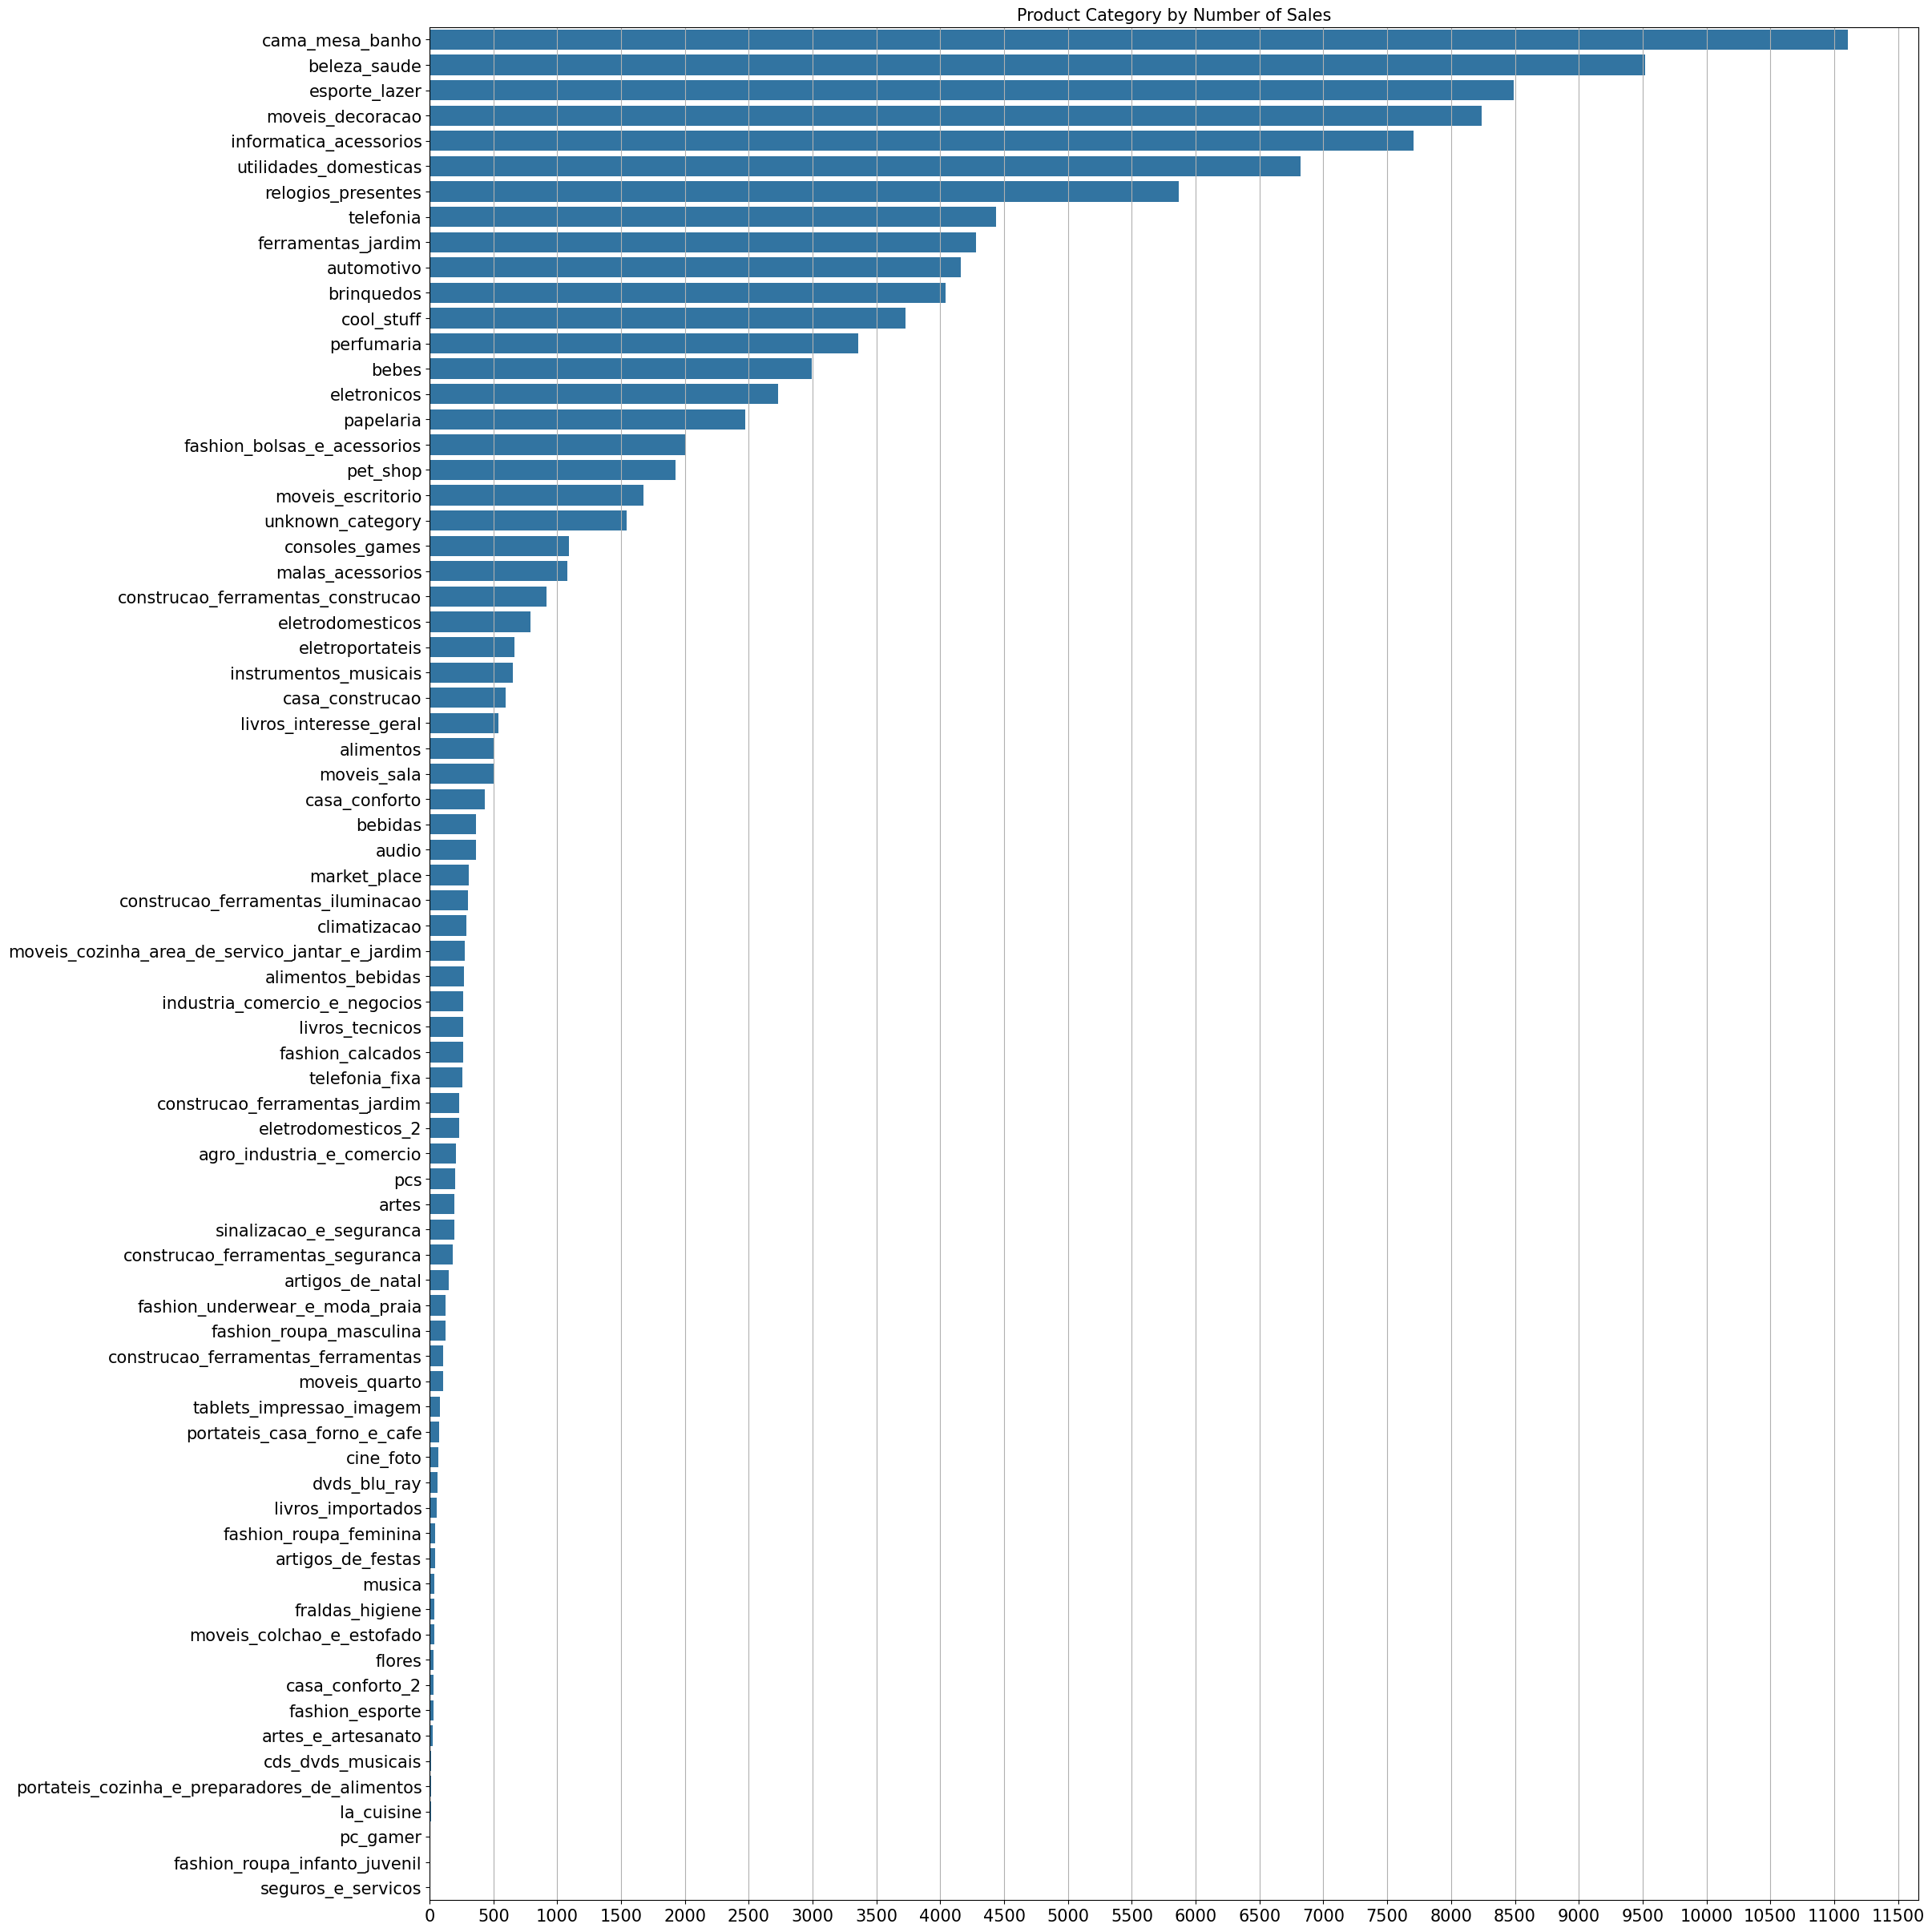

In [82]:
# Visualisasi kategori produk berdasarkan total penjualan

fig, ax = plt.subplots(figsize=(24, 24), layout='constrained')

sns.barplot(
    x='number_of_sales', 
    y='product_category_name', 
    data=product_sum_df.sort_values('number_of_sales', ascending=False), 
    ax=ax,
    orient='y',
)

ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Product Category by Number of Sales', loc='center', fontsize=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True, axis='x')

plt.show()

In [83]:
# Menghitung rata-rata produk yang terjual

product_sum_df.mean()

number_of_sales    1497.837838
dtype: float64

In [84]:
# Menghitung produk dengan penjualan paling sedikit

product_sum_df[product_sum_df.number_of_sales < 500].count()

number_of_sales    46
dtype: int64

**Insight:**
- Kategori produk yang paling banyak terjual adalah cama mesa banho (tempat tidur, meja, dan kamar mandi)
- Kategori produk yang paling sedikit terjual adalah seguros e servicos (layanan dan asuransi)
- Terdapat 46 produk yang terjual di bawah angka 500

### Pertanyaan 5:

Melihat dari dua graph di atas, dapat dilihat bahwa produk dengan rating rata-rata rendah (di bawah 4) memiliki penjualan yang lebih sedikit, begitu juga sebaliknya. 

Hal tersebut tidak dikarenakan rating yang rendah menyebabkan penjualan rendah. Karena produk dengan penjualan tertinggi pun memiliki pun memiliki beberapa review dengan rating rendah.

### Pertanyaan 6

Peta ini dibuat menggunakan gabungan library GeoPandas dan Folium.

- GeoPandas digunakan untuk membuat Dataframe yang menyimpan lokasi tiap pembeli berdasarkan Latitude dan Longitude-nya.
- Folium digunakan untuk membuat menampilkan Dataframe tersebut ke dalam bentuk peta.

In [93]:
geometry = geopandas.points_from_xy(customer_full_df.geolocation_lng, customer_full_df.geolocation_lat)
geo_df = geopandas.GeoDataFrame(customer_full_df, geometry=geometry)

map = folium.Map(location=[15, 30], tiles="Cartodb dark_matter", zoom_start=2)

plugins.FastMarkerCluster([[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]).add_to(map)

map

**Insight:**
- Dari peta tersebut, sebanyak 99% pembeli berasal dari Brazil, Amerika Selatan.

### Pertanyaan 7

Analisis RFM ini dijalankan dengan mengambil data nunique dari kolom order_id, max dari order_purchase_timestamp, dan sum dari total_price. Lalu disimpan ke dalam DataFrame baru dengan nama rfm_df.

In [86]:
rfm_df = order_full_df.groupby('customer_id', as_index=False).agg({
    'order_id': 'nunique',
    'order_purchase_timestamp': 'max',
    'total_price': 'sum',
})

rfm_df.info()

rfm_df.columns = ['customer_id', 'frequency', 'max_order_timestamp', 'monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = order_full_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               98666 non-null  object        
 1   order_id                  98666 non-null  int64         
 2   order_purchase_timestamp  98666 non-null  datetime64[ns]
 3   total_price               98666 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.0+ MB


customer_id  frequency  monetary  recency
0      00012a2ce6f8dcda20d059ce98491703          1    114.74      293
1      000161a058600d5901f007fab4c27140          1     67.41      414
2      0001fd6190edaaf884bcaf3d49edf079          1    195.42      552
3      0002414f95344307404f0ace7a26f1d5          1    179.35      383
4      000379cdec625522490c315e70c7a9fb          1    107.01      154
...                                 ...        ...       ...      ...
98661  fffcb937e9dd47a13f05ecb8290f4d3e          1     91.91      170
98662  fffecc9f79fd8c764f843e9951b11341          1     81.36      158
98663  fffeda5b6d849fbd39689bb92087f431          1     63.13      104
98664  ffff42319e9b2d713724ae527742af25          1    214.13       82
98665  ffffa3172527f765de70084a7e53aae8          1     45.50      366

[98666 rows x 4 columns]

In [87]:
rfm_df.sort_values('frequency', ascending=False).head(5)

customer_id  frequency  monetary  recency
0      00012a2ce6f8dcda20d059ce98491703          1    114.74      293
65713  aa33d697a2f5ee04aae5e9a8227e913e          1    107.78      380
65783  aa5f8aa4c21fe89a04e8d221d4cd8ac1          1     44.28       14
65782  aa5f87b79875f43b90b310decb62356e          1    151.58      312
65781  aa5f5931b8901ae1ca4b8302f9b94c02          1    101.87      332

In [88]:
rfm_df.sort_values('monetary', ascending=False).head(5)

customer_id  frequency  monetary  recency
8475   1617b1357756262bfa56ab541c47bc16          1  13664.08      339
91284  ec5b2ba62e574342386871631fafd3fc          1   7274.88       50
76948  c6e2731c5b391845f6800c97401a43a9          1   6929.31      568
94398  f48d464a0baaea338cb25f816991ab1f          1   6922.21       40
24603  3fd6777bbce08a352fddd04e4a7cc8f6          1   6726.66      467

In [89]:
rfm_df.sort_values('recency', ascending=False).head(5)

customer_id  frequency  monetary  recency
3329   08c5351a6aca1c1589a38f244edeee9d          1    136.23      729
40006  683c54fc24d40ee9f8a6fc179fd9856c          1     75.06      728
51900  86dc2ffce2dfff336de2f386a786e574          1    143.46      718
68438  b106b360fe2ef8849fbbd056f777b4d5          1    109.34      701
43388  70fc57eeae292675927697fe03ad3ff5          1     35.61      700

In [90]:
rfm_df['monetary'].mean()

161.31060669328846

Visualisasi RFM

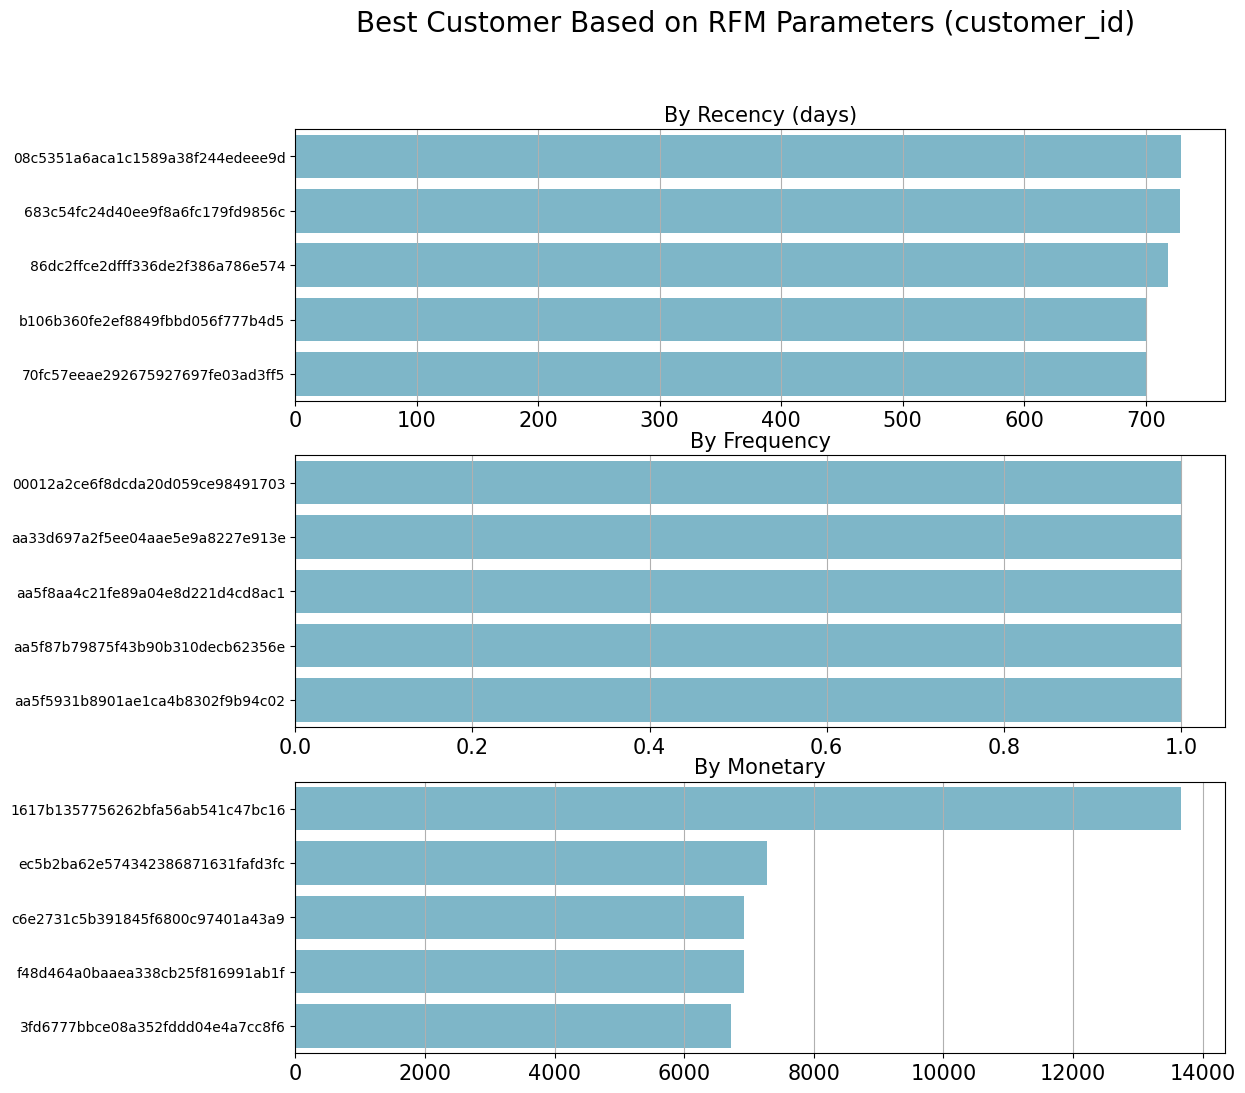

In [91]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(
    x="recency", 
    y="customer_id", 
    data=rfm_df.sort_values(by="recency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[0],
    hue='customer_id',
)

ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=15)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].grid(True, axis='x')
 
sns.barplot(
    x="frequency", 
    y="customer_id", 
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5), 
    palette=colors, 
    ax=ax[1],
    hue='customer_id',
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].grid(True, axis='x')
 
sns.barplot(
    x="monetary", 
    y="customer_id", 
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5), 
    palette=colors, 
    ax=ax[2],
    hue='customer_id',
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=15)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].grid(True, axis='x')
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Pengunjung yang sering berkunjung tidak banyak menghabiskan uangnya.
- Pengunjung hanya mengunjungi website sekali sehari.
- Rata-rata uang yang dikeluarkan pembeli adalah $161 atau sekitar Rp2.500.000.

## Analisis Lanjutan

Berikut adalah visualisasi grafik jika diterapkan binning pada data RFM. Grafik berikut akan mengkategorikan pelanggan berdasarkan seberapa sering mereka berkunjung dan uang yang mereka keluarkan.

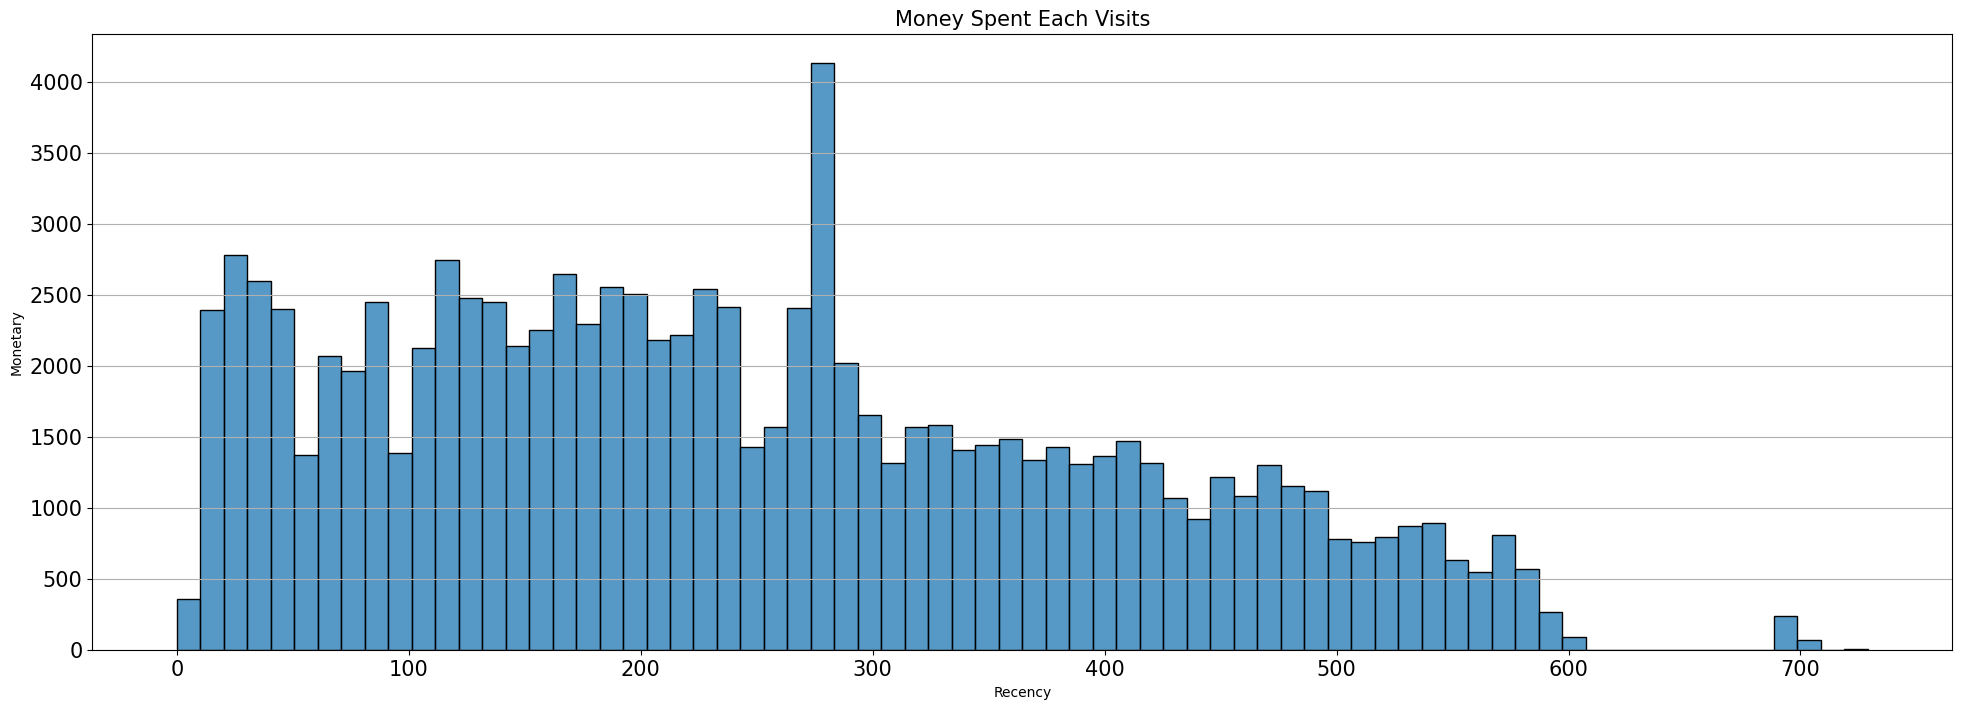

In [92]:
fig, ax = plt.subplots(figsize=(24, 8))

sns.histplot(rfm_df, x='recency', ax=ax)

ax.set_ylabel('Monetary')
ax.set_xlabel('Recency')
ax.set_title("Money Spent Each Visits", loc="center", fontsize=15)
ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)
ax.grid(True, axis='y')

plt.show()

**Insight:**
- Pengunjung yang sering berkunjung tidak banyak menghabiskan uangnya.

## Conclusion

- Rating produk dipengaruhi oleh penjualan produk, bukan sebaliknya.
- Pengunjung yang sering berkunjung tidak banyak menghabiskan uangnya.
- Sebanyak 99% pembeli berasal dari Brazil, Amerika Selatan.